# regresion Tree

## Importing the libraries

In [298]:
# Tratamiento de datos
import numpy as np
import pandas as pd
# Gráficos
import matplotlib.pyplot as plt
# Preprocesado y modelado
# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Configuración warnings

In [299]:
# cargando los datos
Boston= pd.read_csv("Boston.csv",sep=";")
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [300]:
Boston['chas'] = Boston['chas'].astype('object')

In [301]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    object 
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 55.5+ KB


In [302]:
Boston.isna().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [303]:
Boston.describe()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [304]:
# División de los datos en dependiente e independientes
# X = Boston[["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat"]]
# y = Boston['medv']

In [305]:
X_train, X_test, y_train, y_test = train_test_split(
    Boston.drop(columns="medv"),
    Boston ["medv"],
    train_size=0.8,
    random_state =123
    )

In [306]:
X_train.shape

(404, 13)

In [307]:
X_test.shape

(102, 13)

In [308]:
# Creación del modelo
modelo = DecisionTreeRegressor(
    max_depth = 5,
    random_state = 123
    )
# Entrenamiento del modelo
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=123)

Profundidad del árbol: 5
Número de nodos terminales: 25


InvalidParameterError: The 'class_names' parameter of plot_tree must be an array-like, an instance of 'bool' or an instance of 'numpy.bool_' or None. Got 'medv' instead.

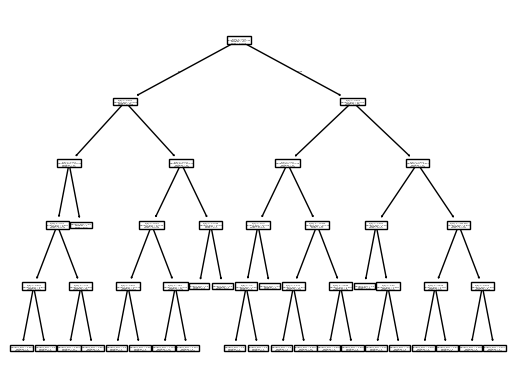

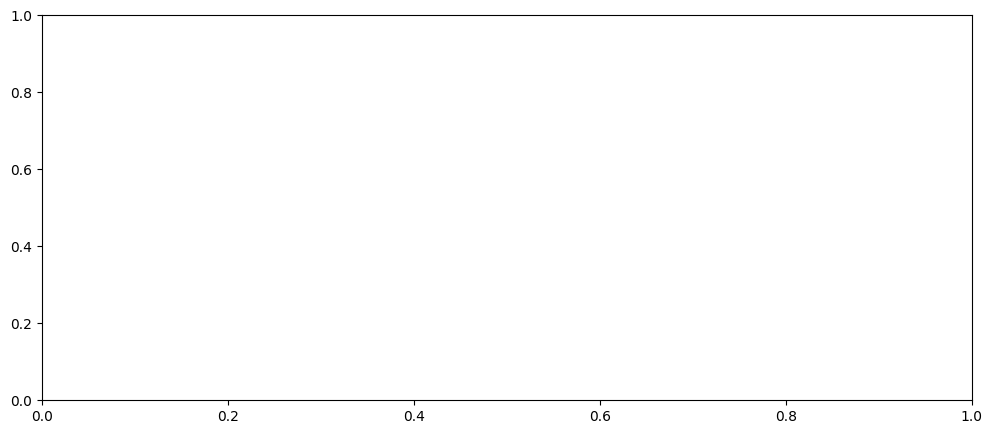

In [311]:
#from sklearn import tree
tree.plot_tree(modelo.fit(X_test, y_test))

# Estructura del árbol creado (prueba y prediccion)
print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

fig, ax = plt.subplots(figsize=(12, 5))
plot = plot_tree(
            decision_tree = modelo,
            feature_names = Boston.drop(columns = "medv").columns,
            class_names   = 'medv',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

plot

In [ ]:
texto_modelo = export_text(
                    decision_tree = modelo,
                    feature_names = list(Boston.drop(columns = "medv").columns)
               )
print(texto_modelo)

In [ ]:
# importancia de los predictores
importancia_predictores = pd.DataFrame(
                            {'predictor': Boston.drop(columns = "medv").columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")


In [ ]:
importancia_predictores.sort_values('importancia', ascending=False)

In [ ]:
predicciones = modelo.predict(X = X_test)

In [ ]:
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

In [ ]:
# print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicciones)))

In [ ]:
# Podado del árbol (pruning)
# Pruning (const complexity pruning) por validación cruzada
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [ ]:
# Mejor valor ccp_alpha encontrado
grid.best_params_

Profundidad del árbol: 15
Número de nodos terminales: 98


InvalidParameterError: The 'class_names' parameter of plot_tree must be an array-like, an instance of 'bool' or an instance of 'numpy.bool_' or None. Got 'medv' instead.

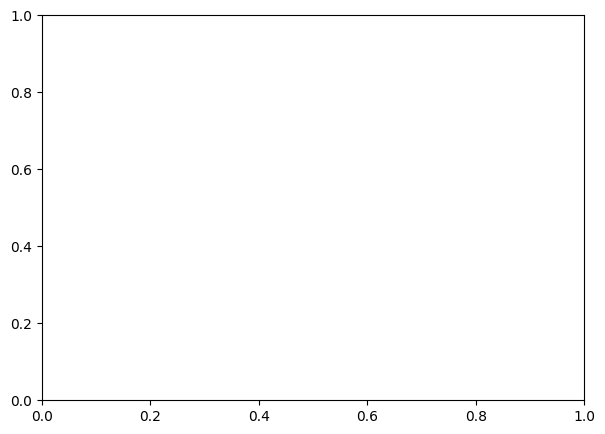

In [312]:
# Estructura del árbol final
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

fig, ax = plt.subplots(figsize=(7, 5))
plot = plot_tree(
            decision_tree = modelo_final,
            feature_names = Boston.drop(columns = "medv").columns,
            class_names   = 'medv',
            filled        = True,
            impurity      = False,
            ax            = ax
       )
plot

In [ ]:
# Predicción y evaluación del modelo

In [ ]:
# Error de test del modelo inicial
predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

In [ ]:
# Error de test del modelo final (tras aplicar pruning)
predicciones = modelo_final.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El proceso de pruning no consigue reducir el error rmse del modelo de 6.52 frente a 6.82. Las predicciones del modelo final se alejan en promedio 5.52 (5520 dólares) del valor real.

In [ ]:
from sklearn import tree
tree.plot_tree(modelo_final.fit(X_test, y_test))